# Flights Data Exploration
## by Roshan Fernando

## Preliminary Wrangling

> This document explores a data set containing United States flights data for year 2008. There are approximately 7000000 flights data in the set. 

In [1]:
# import all packages and set plots to be embedded inline
import requests as rq
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [0]:
# Download the data file from Internet
    
url = 'http://stat-computing.org/dataexpo/2009/2008.csv.bz2'
response = rq.get(url)

# Save downloaded content into a file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
  file.write(response.content)

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('2008.csv.bz2')

In [0]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  ...  NASDelay  SecurityDelay  LateAircraftDelay
0  2008      1           3  ...       NaN            Na

In [0]:
# descriptive statistics for numeric variables
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### What is the structure of your dataset?

> There are 7009728 schedulled flights details for the year 2008 in the United States, with 29 features, including whether the flight was being cancelled or not and whether the flight was being late. Most of the vaiables out of 29 variables are quantitative. However there are qualitativel variables; UniqueCarrier, TailNum, Origin, Dest. There are also few catogerical variables; CancellationCode, Cancelled, and Diverted.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out which UniqueCarrier is the best and the worst.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the CarrierDelay will have the strongest effect while CancellationCode feature will also play a key role as it can help figure out how many cancellations are due to the carriers.
> I am aslo interested in the features 'Cancelled',  'Distance', and 'CarrierDelay'.
> <br> I will be using these features to calculate the followings for each unique carrier:
  - Number of flights cancelled per 100 flights schedulled
  - Carrier delay in minutes per 100 flights operated
  - Carrier delay in minutes per 100 miles distance 

## Univariate Exploration

> In this section,  I investigate the distributions of individual variables of interest. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### What is the distribution of UniqueCarriers in the year 2008? 

> The UniqueCarrier column contains two or three letter abbreviations for each carrier operated in the united states. For the convenience of the future investigations, I will change those to their names.

In [0]:
# Download the carriers.csv data file from Internet
    
url = 'http://stat-computing.org/dataexpo/2009/carriers.csv'
response = rq.get(url)

# Save downloaded content into a file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
  file.write(response.content)

In [3]:
# load in the dataset into a pandas dataframe
carriers = pd.read_csv('carriers.csv')

In [4]:
# Create a list of abbreviations in the UniqueCarriers column
carrier_abr_list = df.UniqueCarrier.value_counts().index

# Create a data frame for the carrier names of interests
carrier_names = carriers[carriers.Code.isin(carrier_abr_list)].reset_index(drop=True)
carrier_names

,Code,Description
0,9E,Pinnacle Airlines Inc.
1,AA,American Airlines Inc.
2,AQ,Aloha Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,CO,Continental Air Lines Inc.
6,DL,Delta Air Lines Inc.
7,EV,Atlantic Southeast Airlines
8,F9,Frontier Airlines Inc.
9,FL,AirTran Airways Corporation


In [5]:
# Truncate Descriptions for clarity
carrier_names['name'] = carrier_names.Description.str.split(' A').str[0]
carrier_names['name'] = carrier_names.name.str.split(' I').str[0]
carrier_names.set_index('Code', inplace = True)

In [6]:
carrier_names

,Description,name
Code,,
9E,Pinnacle Airlines Inc.,Pinnacle
AA,American Airlines Inc.,American
AQ,Aloha Airlines Inc.,Aloha
AS,Alaska Airlines Inc.,Alaska
B6,JetBlue Airways,JetBlue
CO,Continental Air Lines Inc.,Continental
DL,Delta Air Lines Inc.,Delta
EV,Atlantic Southeast Airlines,Atlantic Southeast
F9,Frontier Airlines Inc.,Frontier


In [7]:
# Create a dictionary abbreviations and names
names_dict = dict(carrier_names.name)
names_dict

{'9E': 'Pinnacle',
 'AA': 'American',
 'AQ': 'Aloha',
 'AS': 'Alaska',
 'B6': 'JetBlue',
 'CO': 'Continental',
 'DL': 'Delta',
 'EV': 'Atlantic Southeast',
 'F9': 'Frontier',
 'FL': 'AirTran',
 'HA': 'Hawaiian',
 'MQ': 'American Eagle',
 'NW': 'Northwest',
 'OH': 'Comair',
 'OO': 'Skywest',
 'UA': 'United',
 'US': 'US',
 'WN': 'Southwest',
 'XE': 'Expressjet',
 'YV': 'Mesa'}

In [8]:
# Replace abbreviations with names in UniqueCarrier column
df.UniqueCarrier.replace(names_dict.keys(), names_dict.values(), inplace = True)

In [ ]:
df.to_csv('modified_2008.csv.bz2')

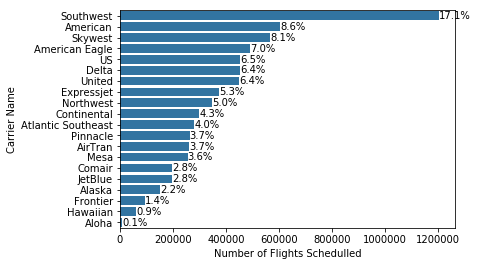

In [31]:
# Use descending order of number of schedulled flights
f_order = df.UniqueCarrier.value_counts().index

# Create a color palette
base_color = sb.color_palette()[0]

# Create a countplot for the column UniqueCarrier
sb.countplot(data = df, y = 'UniqueCarrier', color = base_color, order = f_order);

# Change y-axis label
plt.ylabel('Carrier Name')

# Change x-label
plt.xlabel('Number of Flights Schedulled')

# Show percentages of flights schedulled by carriers
flight_counts = df.UniqueCarrier.value_counts()
for i in range(flight_counts.shape[0]):
  count = flight_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

> The distribution of UniqueCarrier column is dominated by the carrier, Southwest airline with a 17.1% contribution. This seems normal as bigger airline carriers contributions are larger and smale carrier contributions are smaller as expected.

### What is the distribution of Cancelled flights in the year 2008?

> The Cancelled column have two values: 1 for Cancelled flights and 0 for operated flights. I will use a pie chart to visualize this distribution, since there is only two catogories.

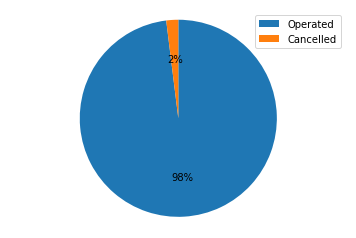

In [12]:
sorted_counts = df['Cancelled'].value_counts()
labels = 'Operated', 'Cancelled'
plt.pie(sorted_counts, startangle = 90,
        counterclock = False, autopct = '%1.f%%');
plt.axis('equal')
plt.legend(labels = labels)

> The pie chart shows that 98% of schedulled flights were operated in 2008 and only 2% has been cancelled. I will see what contribute these cancellations next.

### What is the distribution of CancellationCode in the year 2008?

> The CancellationCode column contains four nominal data points, namely 'A', 'B', 'C', and 'D'. which represents four reasons for cancellations.
> - A - Carrier
> - B - Weather
> - C - NAS (National Airspace System)
> - D - Security

> I will visualize this distribution in a bar graph.

(-1.1203475380869121, 1.118229899676201, -1.102250182748722, 1.136327255014391)

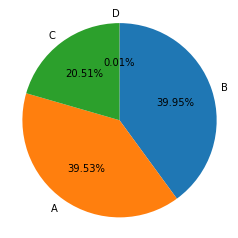

In [13]:
sorted_counts = df['CancellationCode'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct = '%1.2f%%');
plt.axis('square')

> It seems that pie chart is not a good option here as it is not clearly showing security cancellations. I will try a bar chart instead.

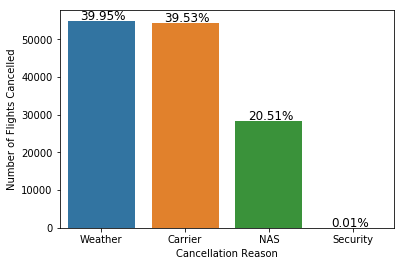

In [14]:
# Use descending order of number of schedulled flights
order = df.CancellationCode.value_counts().index

# Create a countplot for the column UniqueCarrier
sb.countplot(data = df, x = 'CancellationCode', order = order);

# Change x-axis label
plt.xlabel('Cancellation Reason')

# Change y-axis label
plt.ylabel('Number of Flights Cancelled')

# Change x-ticks
ind = np.arange(4)
plt.xticks(ind, ('Weather', 'Carrier', 'NAS', 'Security'))

# Show percentages of flights schedulled by carriers
code_counts = df.CancellationCode.value_counts()
for i in range(code_counts.shape[0]):
  count = code_counts[i]
  pct_string = '{:0.2f}%'.format(100*count/df[df.Cancelled == 1].shape[0])
  plt.text(i-0.25, count+400, pct_string, fontsize = 12);

> The bar chart clearly shows the distribution of each cancellation catogories. Both carrier and weather cancellations are almost equal and top the chart. Carrier cancellations will be investigated further in order to figure out the cancellations by each carrier.

### What is the distribution of Distance in the year 2008?

> The Distance column shows the travel distance of the flights schedulled. They are reported in miles.

(40, 2200)

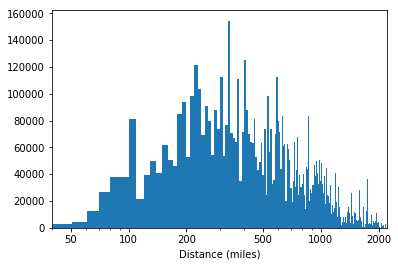

In [15]:
plt.hist(data = df, x = 'Distance', bins = 500);
plt.xscale('log')
plt.xticks([50, 1e2, 2e2, 5e2, 1e3, 2e3], [50, '100', '200', '500', '1000', '2000'])
plt.xlabel('Distance (miles)')
plt.xlim(40, 2200)

> Distribution of Distance is a normal distribution after applying log scale.

### What is the distribution of CarrierDelay in the year 2008?

> The CarrierDelay column in the data set shows the delay time in minutes for the schedulled flights due to carrier. 

Text(0.5, 0, 'Delay (minutes)')

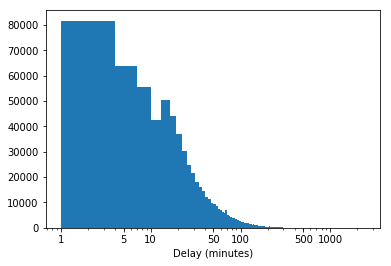

In [16]:
plt.hist(data = df[df.CarrierDelay > 0], x = 'CarrierDelay', bins = 800);
plt.xscale('log')
plt.xticks([1, 5, 10, 50, 100, 500, 1000], [1, 5, 10, 50, 100, 500, 1000])
plt.xlabel('Delay (minutes)')

> The distribution of log values of flight delay times are right-skewed. Most delays occured are within 1 - 10 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of UniqueCarrier is the main variable of interest. Considering the type of this variable, I believe the distribution is normal. The carrier Southwest Airline has more appearences in 2008, meaning they have the most flights schedulled, taking 17.1% overall. I could not find any unusual points here. The data did not need any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I could not any unusual distributions among the features investigated. Again considering the type of this data set, I believe it is normal. However, the distributions of Distance and CarrierDelay were performed in 'log' scale to get a meaningful visualization.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the flights
data. First, I am going to make a data frame that include only the data need for this study. I will also create calculated columns in this data frame so that I can use it in multivariate exploration as well.
> <br>The columns in this new data set will be as follows:
- carrier_name --> the unique name of the carrier
- num_schedulled --> the total number of flights schedulled by the carrier
- num_cancelled --> the total number of flights cancelled by the carrier
- num_delayed --> the total number of flights delayed by the carrier
- total_delay --> the total delay in minutes by the carrier
- total_distance --> the total distance in miles flew by the carrier

> <br> after creating the data frame with the columns above, the following columns will be generated.
- pct_cancelled --> the number of flights cancelled per 100 flights schedulled by the carrier
- pct_delayed --> the number of flights delayed per 100 flights operated by the carrier
- delay_per_flight -->  carrier delay in minutes per flight operated
- delay_per_mile  --> carrier delay in minutes per 100 miles distance

In [17]:
# Extract the total number of flights schedulled by carriers
s1 = df.UniqueCarrier.value_counts() # for the column 'num_schedulled'
s1

Southwest             1201754
American               604885
Skywest                567159
American Eagle         490693
US                     453589
Delta                  451931
United                 449515
Expressjet             374510
Northwest              347652
Continental            298455
Atlantic Southeast     280575
Pinnacle               262208
AirTran                261684
Mesa                   254930
Comair                 197607
JetBlue                196091
Alaska                 151102
Frontier                95762
Hawaiian                61826
Aloha                    7800
Name: UniqueCarrier, dtype: int64

In [18]:
# Extract the total number of flights cancelled by the carrier
s2 = df[df.Cancelled == 1].UniqueCarrier.value_counts() # for the column 'num_cancelled'
s2

American Eagle        18331
American              17440
Skywest               12436
Southwest             12389
United                10541
Expressjet             9992
Mesa                   9219
Pinnacle               7100
Delta                  6813
US                     6582
Comair                 6462
Atlantic Southeast     5026
Continental            3702
JetBlue                3205
Northwest              2906
AirTran                2236
Alaska                 2139
Hawaiian                570
Frontier                303
Aloha                    42
Name: UniqueCarrier, dtype: int64

In [19]:
# Extract the total number of flights delayed by the carrier
s3 = df[df.CarrierDelay > 0].UniqueCarrier.value_counts() # for the column 'num_delayed'
s3

Southwest             117195
American               72843
United                 46847
American Eagle         44592
Delta                  41296
Skywest                39663
US                     38134
Atlantic Southeast     37398
Northwest              36800
Expressjet             34914
Mesa                   30855
Continental            28618
JetBlue                21451
Comair                 21308
Pinnacle               16176
AirTran                13943
Alaska                 12374
Frontier               11264
Hawaiian                4718
Aloha                    233
Name: UniqueCarrier, dtype: int64

In [20]:
# Get the total delay in minutes by the carrier by the carrier
# Sum of CarrierDelay
s4 = df.groupby(['UniqueCarrier']).CarrierDelay.sum() # for the column 'total_delay'
s4

UniqueCarrier
AirTran                443708.0
Alaska                 481833.0
Aloha                    8727.0
American              2821907.0
American Eagle        1705271.0
Atlantic Southeast    1688969.0
Comair                1075766.0
Continental            996161.0
Delta                 1411220.0
Expressjet            1218009.0
Frontier               250971.0
Hawaiian               184855.0
JetBlue                677621.0
Mesa                  1927740.0
Northwest             1478247.0
Pinnacle               908509.0
Skywest               1678216.0
Southwest             2261002.0
US                    1109335.0
United                1720150.0
Name: CarrierDelay, dtype: float64

In [21]:
# Get the total distance flew by the carrier
# Sum of distances of all operated (not cancelled) flights
s5 = df[df.Cancelled == 0].groupby(['UniqueCarrier']).Distance.sum()
s5

UniqueCarrier
AirTran               188830439
Alaska                143071050
Aloha                   3295411
American              620867393
American Eagle        194707043
Atlantic Southeast    122307769
Comair                 93273693
Continental           340690577
Delta                 412102226
Expressjet            215287217
Frontier               84035990
Hawaiian               34562911
JetBlue               212671088
Mesa                   96986502
Northwest             277844318
Pinnacle              115085239
Skywest               239289236
Southwest             756840555
US                    384276631
United                475895169
Name: Distance, dtype: int64

In [22]:
# Concat all of the above five series into a data frame
df_f = pd.concat((s1.rename('num_schedulled'),
                  s2.rename('num_cancelled'),
                  s3.rename('num_delayed'),
                  s4.rename('total_delay'),
                  s5.rename('total_distance')),
                  axis=1,
                  sort = False).reset_index()
df_f

,index,num_schedulled,num_cancelled,num_delayed,total_delay,total_distance
0,Southwest,1201754,12389,117195,2261002.0,756840555
1,American,604885,17440,72843,2821907.0,620867393
2,Skywest,567159,12436,39663,1678216.0,239289236
3,American Eagle,490693,18331,44592,1705271.0,194707043
4,US,453589,6582,38134,1109335.0,384276631
5,Delta,451931,6813,41296,1411220.0,412102226
6,United,449515,10541,46847,1720150.0,475895169
7,Expressjet,374510,9992,34914,1218009.0,215287217
8,Northwest,347652,2906,36800,1478247.0,277844318
9,Continental,298455,3702,28618,996161.0,340690577


In [0]:
# Add column 'pct_cancelled'
# The number of flights cancelled per 100 flights schedulled by the carrier

df_f['pct_cancelled'] = (df_f.num_cancelled / df_f.num_schedulled) * 100

In [0]:
# Add column 'pct_delayed'
# The number of flights delayed per 100 flights operated by the carrier

df_f['pct_delayed'] = (df_f.num_delayed / (df_f.num_schedulled - df_f.num_cancelled)) * 100

In [0]:
# Add column 'delay_per_flight'
# carrier delay in minutes per flight operated

df_f['delay_per_flight'] = (df_f.total_delay / (df_f.num_schedulled - df_f.num_cancelled))

In [0]:
# Add column 'delay_per_mile'
# carrier delay in minutes per mile distance

df_f['delay_per_mile'] = (df_f.total_delay / df_f.total_distance)

In [0]:
df_f.rename({'index':'carrier_name'}, axis = 'columns', inplace = True)

In [28]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
carrier_name        20 non-null object
num_schedulled      20 non-null int64
num_cancelled       20 non-null int64
num_delayed         20 non-null int64
total_delay         20 non-null float64
total_distance      20 non-null int64
pct_cancelled       20 non-null float64
pct_delayed         20 non-null float64
delay_per_flight    20 non-null float64
delay_per_mile      20 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ KB


In [0]:
# Save this data frame as a csv file
df_f.to_csv('carrier_sorted_2008.csv')

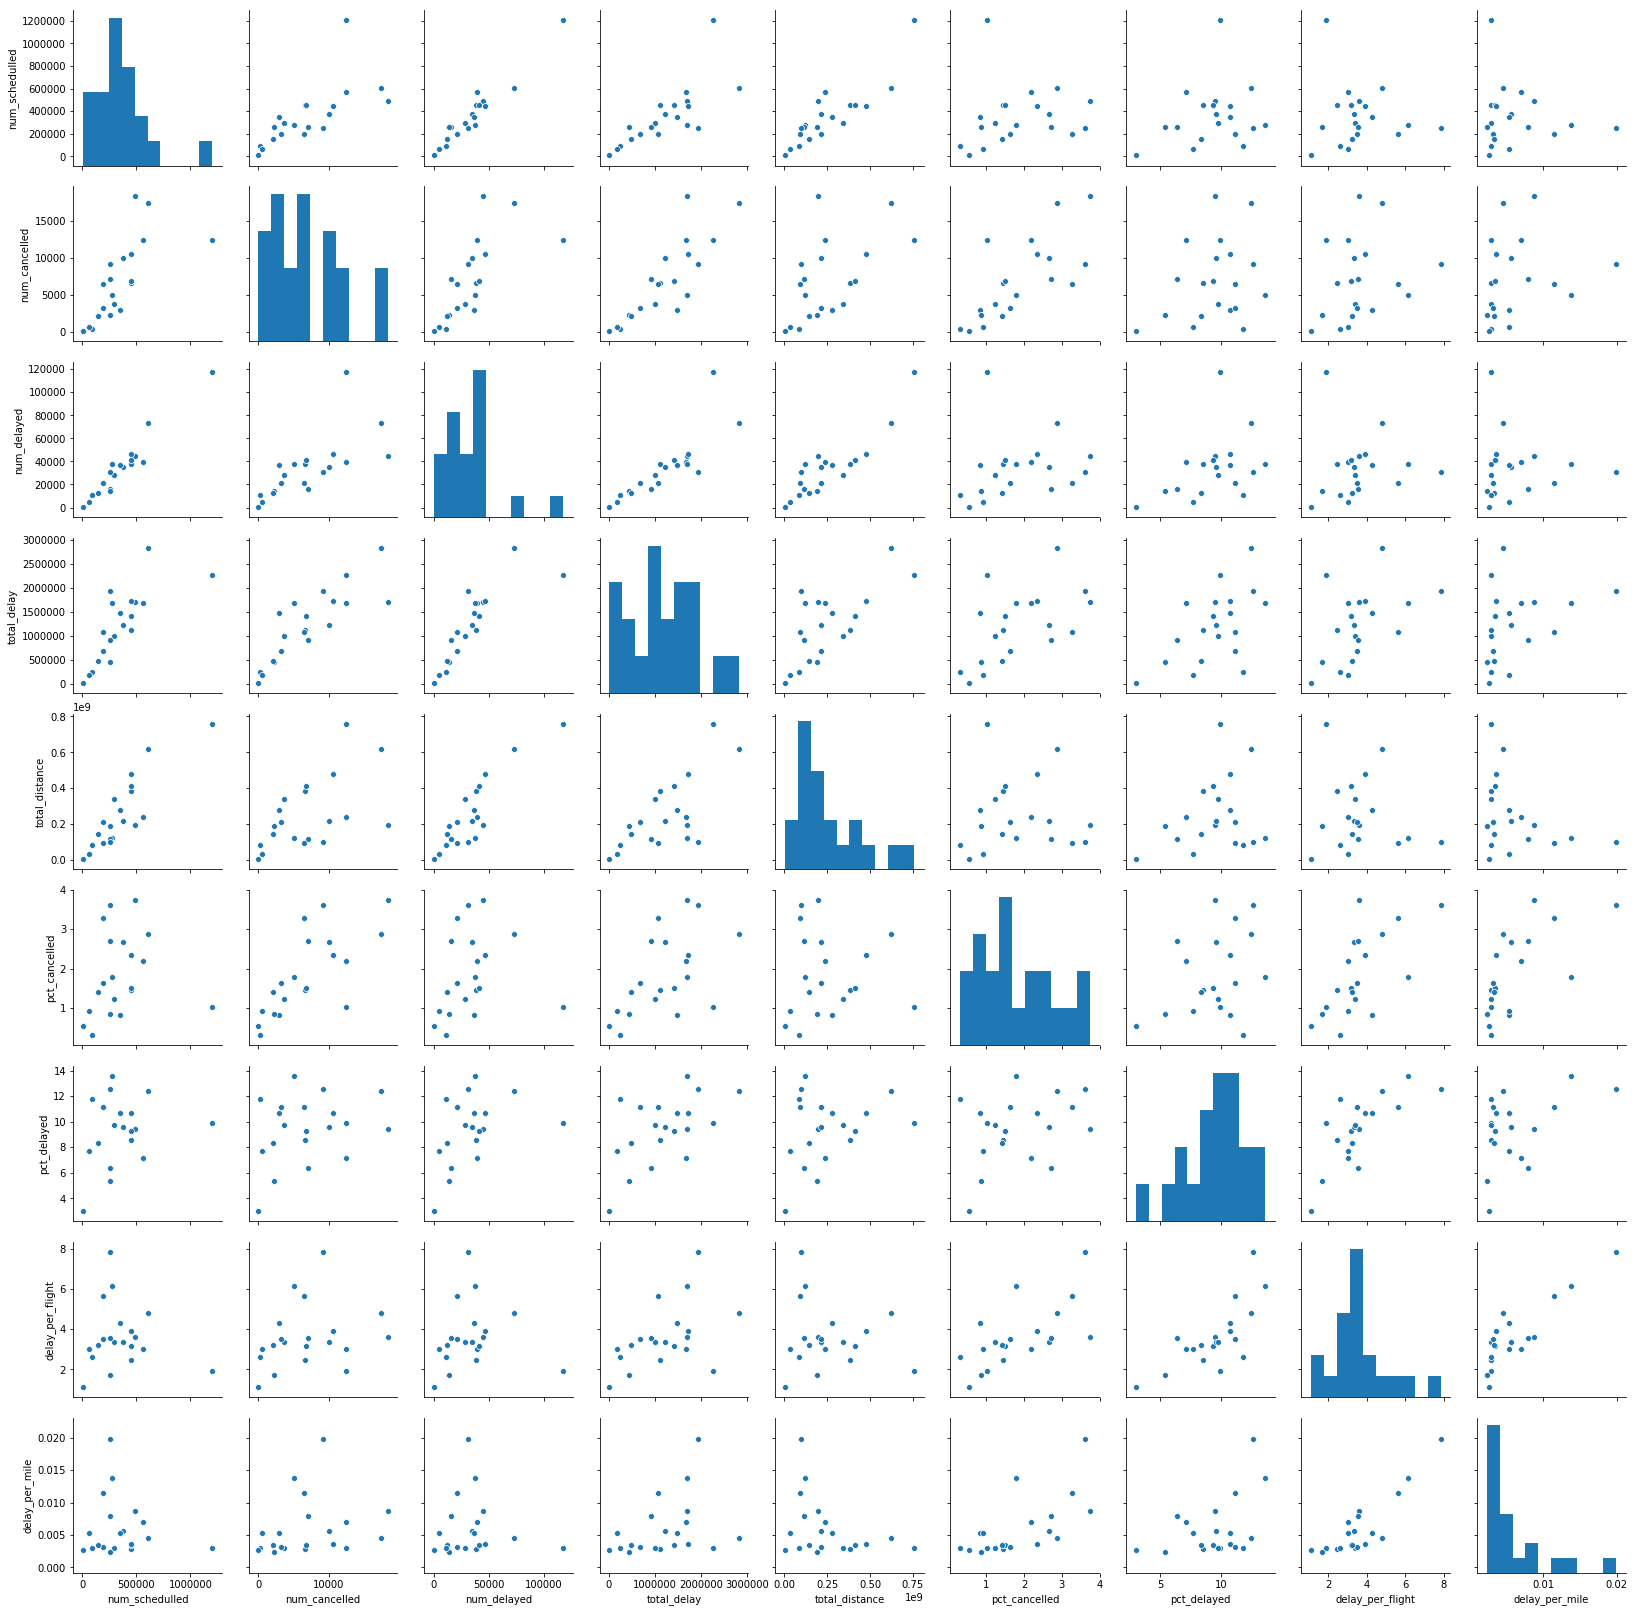

In [0]:
sb.pairplot(df_f);

In [0]:
df_f.corr()

,num_schedulled,num_cancelled,num_delayed,total_delay,total_distance,pct_cancelled,pct_delayed,delay_per_flight,delay_per_mile
num_schedulled,1.000000,0.698857,0.965098,0.758019,0.871275,0.156538,0.193153,-0.098696,-0.112013
num_cancelled,0.698857,1.000000,0.702816,0.843553,0.559852,0.729877,0.286605,0.257686,0.241837
num_delayed,0.965098,0.702816,1.000000,0.836033,0.892667,0.190134,0.378645,0.053530,-0.033507
total_delay,0.758019,0.843553,0.836033,1.000000,0.702498,0.555724,0.560092,0.484199,0.341482
total_distance,0.871275,0.559852,0.892667,0.702498,1.000000,0.011261,0.261370,-0.133167,-0.357897
pct_cancelled,0.156538,0.729877,0.190134,0.555724,0.011261,1.000000,0.341493,0.654483,0.660523
pct_delayed,0.193153,0.286605,0.378645,0.560092,0.261370,0.341493,1.000000,0.729761,0.441581
delay_per_flight,-0.098696,0.257686,0.053530,0.484199,-0.133167,0.654483,0.729761,1.000000,0.866940
delay_per_mile,-0.112013,0.241837,-0.033507,0.341482,-0.357897,0.660523,0.441581,0.866940,1.000000


### How many flights have been cancelled by each carrier in the 2008 and How is it compare to each other carriers?

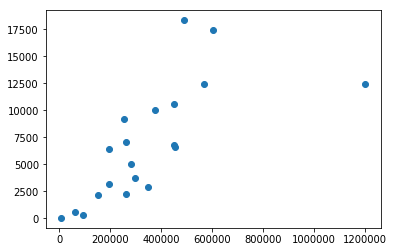

In [0]:
# The relationship between num_schedulled vs. num_cancelled
plt.scatter(data = df_f, x = 'num_schedulled', y = 'num_cancelled');

> There is no strong correlation between the number of schedulled flights vs. the number of cancelled flights. The correlation coefficient is moderate with a value of 0.7. This means that the carrier cancellations is a strong factor deciding the carrier performances.

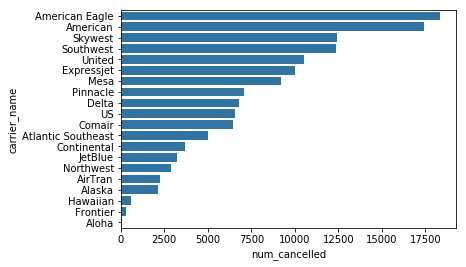

In [0]:
# Plot num_cancelled for each carrier
base_color = sb.color_palette()[0]
cancelled = df_f.sort_values('num_cancelled', ascending = False)
cancelled
sb.barplot(x = 'num_cancelled', y = 'carrier_name', data = cancelled, color = base_color)

> American Eagle and American airlines top the chart for most number of cancellations. However, I will see the number of cancellations per 100 schedulled flights (pct_cancelled) for each carrier to make it more meaningful to rate carriers.

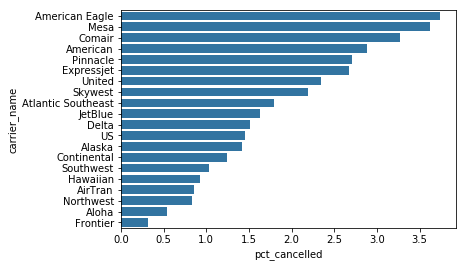

In [0]:
# Plot pct_cancelled for each carrier
base_color = sb.color_palette()[0]
pct_cancelled = df_f.sort_values('pct_cancelled', ascending = False)
sb.barplot(x = 'pct_cancelled', y = 'carrier_name', data = pct_cancelled, color = base_color)

> American Eagle still top the chart for percent cancellations, however Mesa airline became second. I will use pct_cancelled as a key factor to decide the carrier performances.

### How many flights have been delayed by each carrier in the 2008 and How is it compare to each other carriers?

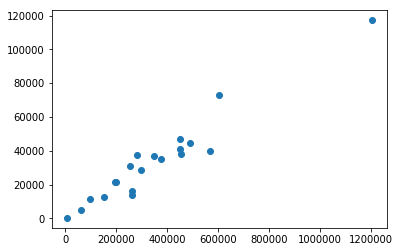

In [0]:
# The relationship between num_schedulled vs. num_delayed
plt.scatter(data = df_f, x = 'num_schedulled', y = 'num_delayed');

> There is linear relationship between num_delayed and num_schedulled flights. The correlation coefficient for this is 0.97. Therefore the num_delayed by each carrier should probably follow the same trend (order) as in the case of num_schedulled flights.

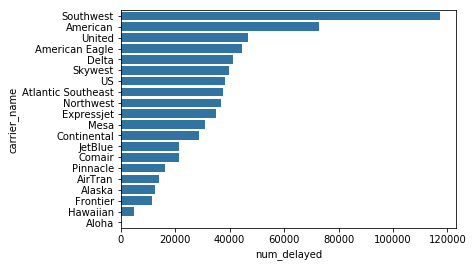

In [0]:
base_color = sb.color_palette()[0]
delayed = df_f.sort_values('num_delayed', ascending = False)
sb.barplot(x = 'num_delayed', y = 'carrier_name', data = delayed, color = base_color)

> As expected, the descending order of carrier names for num_delayed more closely follow the descending order of num_schedulled, however there are few differences. I am not going to explore deep in these differences and instead I am going to see how each carrier's number of delayed flights for 100 flights operated (pct_delayed).

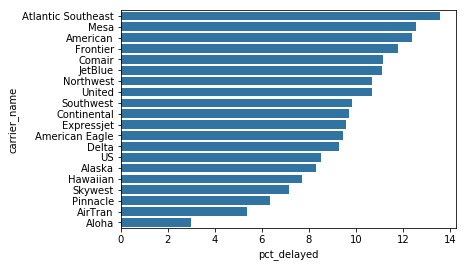

In [0]:
base_color = sb.color_palette()[0]
pct_delayed = df_f.sort_values('pct_delayed', ascending = False)
sb.barplot(x = 'pct_delayed', y = 'carrier_name', data = pct_delayed, color = base_color)

> This is interesting that the order of carriers changed dramatically. Atlantic Southwest Airlines has the highest percentage close to 14 % and the lowest is about 3% for Aloha Airlines. This is a good parameter for rating carrier performances.

### What is the delay per flight operated by each carrier?

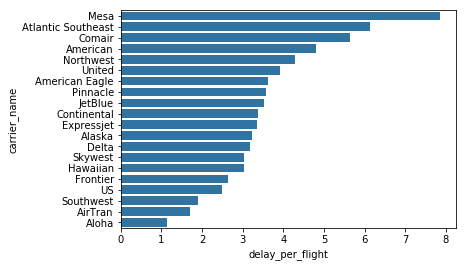

In [0]:
base_color = sb.color_palette()[0]
delay_pf = df_f.sort_values('delay_per_flight', ascending = False)
sb.barplot(x = 'delay_per_flight', y = 'carrier_name', data = delay_pf, color = base_color)

> The delay_per_flight means the delay in minutes per a flight operated by the carrier. Mesa Airlines has the higest value of almost 8 minutes of delay. This means one can expect 8 min delay for flights operated by this carrier. This is another key parameter I would like to consider for ratings.

### What is the delay per mile flew by each carrier?

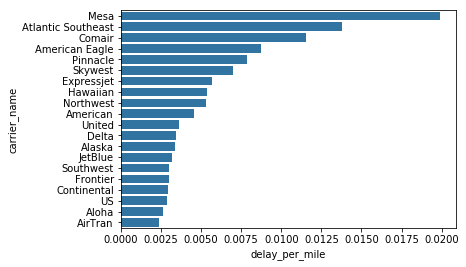

In [0]:
base_color = sb.color_palette()[0]
delay_pm = df_f.sort_values('delay_per_mile', ascending = False)
sb.barplot(x = 'delay_per_mile', y = 'carrier_name', data = delay_pm, color = base_color)

> Here, the order of carriers changed except for the top three compared to delay_per_flight. My intial thoughts about this parameter actually changed. I will not consider this for carrier ratings. The reason is that some carriers might only operated in longer distance flights and it will give them a lower value for this.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The feature I chose to work with from this data set is the UniqueCarrier, and as I expected there is no systematic relationship between the UniqueCarrier and the other features in the data set. It is however normal considering the nature of the data set and the exploration that I am interested in finding out.
> For example, carriers with the most number of schedulled flights was not the carriers who had most number of cancellations, this is indeed come in handy for rating carrier performances.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One interesting relationship observed was the linear relationship between the num_schedulled and num_delayed. These two have a correlation coefficient of 0.97.

## Multivariate Exploration

> Here I will create a scatter plot that shows carrier performances. This plot  will clearly show which carriers were the worst and the best in 2008. I will use the features 'pct_cancelled', 'pct_delayed' and 'delay_per_flight'.

Text(0.5, 1.0, 'Comparison of Carrier Performances in 2008')

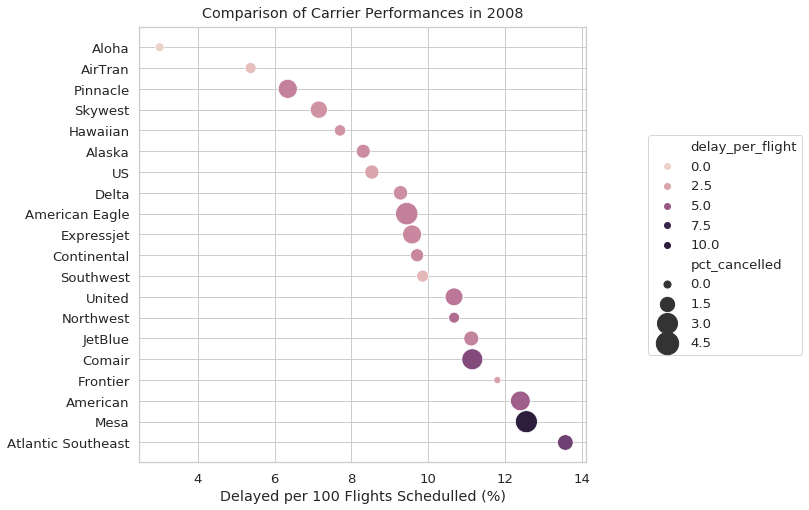

In [34]:
# Set figure size
plt.figure(figsize = (8, 8))

# Set data
cmap = sb.cubehelix_palette(as_cmap=True)
pct_delayed = df_f.sort_values('pct_delayed', ascending = False)

sb.set_style('whitegrid')
sb.set_context("notebook", font_scale=1.2)

# Plot data
sb.scatterplot(data =pct_delayed, x = 'pct_delayed', y = 'carrier_name',
              hue = 'delay_per_flight', size = 'pct_cancelled', palette = cmap,
              sizes = (50, 500), hue_order = (5, 100));
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

# Change x-axis label
plt.xlabel('Delayed per 100 Flights Schedulled (%)')

# Change y-axis label
plt.ylabel('')

# Set title
plt.title('Comparison of Carrier Performances in 2008',
         pad = 10)

> Here in this graph y-axis containing carrier names are ordered in increasing 'pct_delayed'. The hue and size respectively shows 'delay_per_flight' and 'pct_cancelled'.
As overall Mesa Airline is the worst and Aloha Airline is the best.

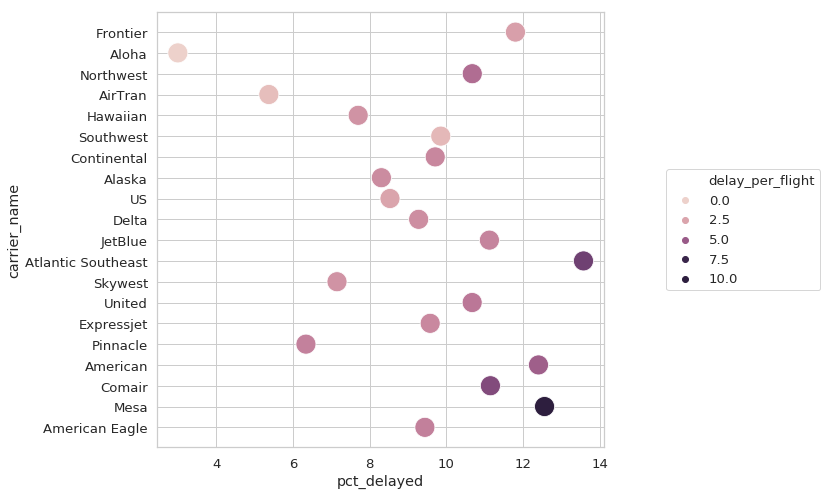

In [0]:
plt.figure(figsize = (8, 8))
cmap = sb.cubehelix_palette(as_cmap=True)
pct_cancelled = df_f.sort_values('pct_cancelled', ascending = False)
sb.set_style('whitegrid')
sb.set_context("notebook", font_scale=1.2)
sb.scatterplot(data = pct_cancelled, x = 'pct_delayed', y = 'carrier_name',
               hue = 'delay_per_flight', palette = cmap,
               hue_order = (50, 1000), s = 400);
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

> For this plot, I did not use the size encoding, instead I arraged the carrier names in the y-axis in the increasing order of 'pct_cancelled'.
> But the plot look messy and clear the point like the previous.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The three features, that I engineered from the data set in order to figure out the worst carrier really strengthened each other to rate the carriers. 

### Were there any interesting or surprising interactions between features?

> It is interesting to see that 'pct_delay' have backward 'S'. In other ward pct_delay per increased rapidly in the begining and in the middle it increased slowly, and at the end it increased rapidly again.